# **Part 1: Exploratory Data Analysis (EDA)**

**Step 1:**
import all main python libraries: pandas, numpy, matplotlib

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn 

**Step 2:** import data from '../data' directory having 2 datasets, one for training and one for testing

In [359]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

**Step 3:** to check if the import is done correctly show the first 5 entries of the training data

**Step 4:** to understand more the data we have we should see what dimensions we are working with (shape), description and more detailed information about the number of entries and columns, the class type of each column in our data, and the number of non-null values in each column (info)

In [90]:
train_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [91]:
train_data.shape

(1309, 14)

In [92]:
train_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [94]:
train_data['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

**Step 5:** to better understand the percentage of survival of people, we have to view the relation of survival rate and a couple of categories: gender, age and ticket type

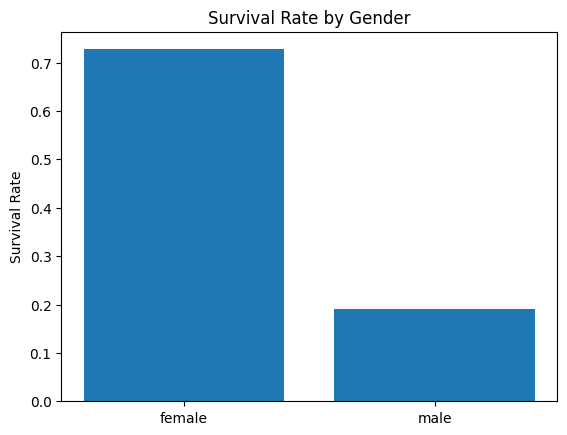

In [321]:

# Calculate mean survival rate per gender
gender_survival = train_data.groupby('sex')['survived'].mean()

# Plot
plt.bar(gender_survival.index, gender_survival.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()


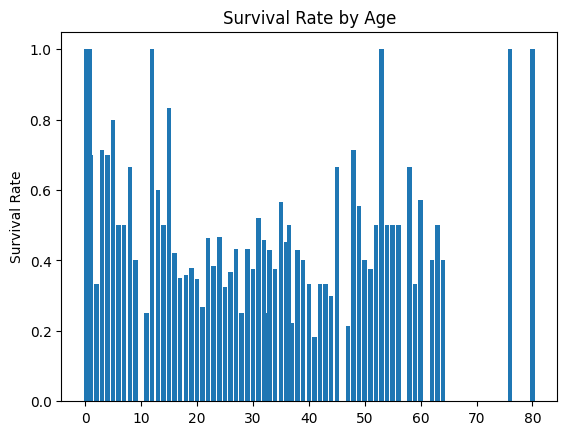

In [96]:
age_survival = train_data.groupby('age')['survived'].mean()
plt.bar(age_survival.index, age_survival.values)
plt.title('Survival Rate by Age')
plt.ylabel('Survival Rate')
plt.show()




Text(0, 0.5, 'Survival Rate')

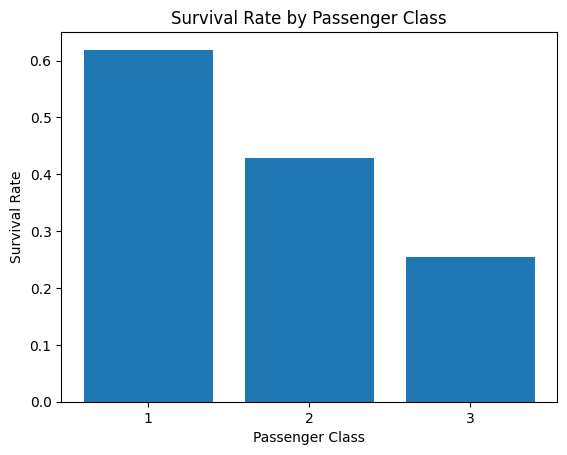

In [97]:
ticket_survival = train_data.groupby('pclass')['survived'].mean()
plt.bar(ticket_survival.index.astype(str), ticket_survival.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# **Part 2: Data Preprocessing**

**Step 1: Handle missing values**
before we start working on the model, we have to fill all NaN values in the columns.
so we have to see what are the column that have NaN values and then fill them

In [360]:
# Drop irrelevant features
train_data.drop('boat', axis=1, inplace=True)
train_data.drop('body', axis=1, inplace=True)
train_data.drop('home.dest', axis=1, inplace=True)

In [361]:
# Check for missing values
train_data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [362]:
# Fill missing age values with median age
train_data["age"].fillna(train_data["age"].median(), inplace=True)

/var/folders/x0/yt14qk2d6b1bp2sl_j03gpjr0000gn/T/ipykernel_25586/1449790080.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["age"].fillna(train_data["age"].median(), inplace=True)


In [363]:
# Fill missing fare values with median fare
train_data['fare'].fillna(train_data['fare'].median(), inplace=True)

/var/folders/x0/yt14qk2d6b1bp2sl_j03gpjr0000gn/T/ipykernel_25586/2320966334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['fare'].fillna(train_data['fare'].median(), inplace=True)


In [364]:
# Fill missing cabin values with 'Unknown'
train_data['cabin'].fillna('Unknown', inplace=True)

/var/folders/x0/yt14qk2d6b1bp2sl_j03gpjr0000gn/T/ipykernel_25586/2662308680.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['cabin'].fillna('Unknown', inplace=True)


In [365]:
# Fill missing embarked values with mode
train_data['embarked'].fillna(train_data['embarked'].mode()[0], inplace=True)

/var/folders/x0/yt14qk2d6b1bp2sl_j03gpjr0000gn/T/ipykernel_25586/2154609455.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['embarked'].fillna(train_data['embarked'].mode()[0], inplace=True)


**Step 2: Encode categorical features** convert categorical columns to numerical 

In [366]:
# Verify no missing values remain
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   cabin     1309 non-null   object 
 10  embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [367]:
# Convert categorical columns to numerical
train_data['sex'] = train_data['sex'].map({'male': 0, 'female': 1})


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['embarked'] = le.fit_transform(train_data['embarked'])

#It replaces embarked categories with integer numbers:

# Category	Encoded
# C         	0
# Q         	1
# S         	2


**Step 3: Feature engineering**
 extract titles from names, and group ages into age groups, and check the survival rate based on family size and if the passenger is alone

In [368]:
# Create age bins and calculate survival rates per age group
train_data['AgeGroup'] = pd.cut(train_data['age'], 
                                bins=[0, 12, 18, 30, 65, 80], 
                                labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# train_data.groupby('AgeGroup')['survived'].mean()
# convert categorical columns to numeric
train_data['AgeGroup']= train_data['AgeGroup'].map({'Child':0, 'Teen':1, 'Young Adult':2, 'Adult':3, 'Senior':4})
train_data['AgeGroup'] = train_data['AgeGroup'].astype(int)


In [369]:
# Extract titles from names and print their counts
train_data['title'] = train_data['name'].str.extract(r',\s*([^\.]+)\.')
# print(train_data['title'].value_counts())
train_data['title']= train_data['title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':4, 'Rev':5, 'Col':6, 'Mlle':7, 'Major':8, 'Ms':9, 'Lady':10, 'Jonkheer':11, 'Don':12, 'Countess':13, 'Capt':14, 'Sir':15})

# Calculate and print mean survival rate per title
# print(train_data.groupby('title')['survived'].mean())


In [370]:
# Create family size feature to capture family influence on survival
train_data['family_size'] = train_data['sibsp'] + train_data['parch'] + 1
# print(train_data.groupby('family_size')['survived'].mean())

# Create is_alone feature to indicate if passenger is alone and its impact on survival
train_data['is_alone'] = train_data['family_size'].apply(lambda x: 1 if x == 1 else 0)
# print(train_data.groupby('is_alone')['survived'].mean())

# **Part 3: Model Building**

**Step 1:** before testing the models we have to classify our data into train and test, X and y for each, where the X contains all the input data except the survive col, and y contains only the output (survive col)

In [371]:
X = train_data.drop(['survived', 'name', 'ticket', 'cabin', 'title'], axis=1)
y = train_data['survived']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# check the shapes 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1047, 10), (1047,), (262, 10), (262,))

**Step 2:** prepare the model: Random Forest Classifier

In [388]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
}
results = {}

**Step 3:** train the models defined and show the score of each to see what is more accurate 

In [396]:
np.random.seed(42) # set random seed for reproducibility

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

{'Random Forest': 0.7709923664122137,
 'Logistic Regression': 0.7748091603053435}